In [24]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [25]:
#imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import tensorflow as tf
%tensorflow_version 1.x
print(tf.__version__)

import warnings
warnings.filterwarnings("ignore")

from keras.layers import Input, Dense, Reshape, Flatten, Dropout, BatchNormalization, Embedding
from keras.layers.advanced_activations import LeakyReLU
from keras.layers.merge import concatenate
from keras.models import Sequential, Model
from keras.optimizers import Adam
from keras.utils import to_categorical
from keras.layers.advanced_activations import LeakyReLU
from keras.utils.vis_utils import plot_model
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, LabelEncoder
import scipy.stats

TensorFlow is already loaded. Please restart the runtime to change versions.
2.4.0


In [26]:
# Google drive
GDRIVE_DIR = "/content/gdrive" # Your own mount point on Google Drive
GDRIVE_HOME_DIR = GDRIVE_DIR + "/My Drive" # Your own home directory
GDRIVE_DATA_DIR = GDRIVE_HOME_DIR + "/BDCDataSet/" # Your own data directory
from google.colab import drive
drive.mount(GDRIVE_DIR, force_remount=True)
###################################################
#Read Data
COLUMNS_NAMES = {"orderbook": ["sell", "vsell", "buy", "vbuy"],
                 "message": ["time", "event_type", "order_id", "size", "price", "direction"]}

messages = pd.read_csv("/content/gdrive/MyDrive/Classroom/AI4Trading/AAPL_2012-06-21_34200000_57600000_message_1.csv", names=COLUMNS_NAMES["message"])
orderbook = pd.read_csv("/content/gdrive/MyDrive/Classroom/AI4Trading/AAPL_2012-06-21_34200000_57600000_orderbook_1.csv", names=COLUMNS_NAMES["orderbook"])

#print("History messages")
#print(messages)
#print("Orderbook")
#print(orderbook)
###################################################
#Merge Data
df_combined = messages.copy()
df_combined[COLUMNS_NAMES["orderbook"]] = orderbook
#print(df_combined)
###################################################
df_combined = df_combined[(df_combined["event_type"].isin([4,5]))]
#print(df_combined)
###################################################
#Drop Not Useful Coloumns
Final_df=df_combined.copy()
Final_df.drop(['order_id', 'sell', 'vsell', 'buy', 'vbuy','time','event_type' ], axis=1, inplace=True)
Final_df.to_csv(r'/content/gdrive/MyDrive/Classroom/AI4Trading/painGAN.csv', index = False)
print(Final_df)
discrete = pd.DataFrame(columns = ['size','price','direction'])
print(discrete)

Mounted at /content/gdrive
        size    price  direction
7         40  5857400         -1
8         25  5857500         -1
9          1  5857300          1
10        10  5857300          1
11        25  5857500         -1
...      ...      ...        ...
118488    89  5775500          1
118492   103  5776000          1
118493    11  5776000          1
118495    48  5776100         -1
118496    52  5776350         -1

[34990 rows x 3 columns]
Empty DataFrame
Columns: [size, price, direction]
Index: []


In [27]:
#Read Data
COLUMNS_NAMES = {"orderbook": ["sell", "vsell", "buy", "vbuy"],
                 "message": ["time", "event_type", "order_id", "size", "price", "direction"]}

messages1 = pd.read_csv("/content/gdrive/MyDrive/Classroom/AI4Trading/AMZN_2012-06-21_34200000_57600000_message_1.csv", names=COLUMNS_NAMES["message"])
orderbook1 = pd.read_csv("/content/gdrive/MyDrive/Classroom/AI4Trading/AMZN_2012-06-21_34200000_57600000_orderbook_1.csv", names=COLUMNS_NAMES["orderbook"])

#print("History messages")
#print(messages1)
#print("Orderbook")
#print(orderbook1)
###################################################
#Merge Data
df_combined1 = messages1.copy()
df_combined1[COLUMNS_NAMES["orderbook"]] = orderbook1
#print(df_combined1)
###################################################
df_combined1 = df_combined1[(df_combined1["event_type"].isin([4,5]))]
#print(df_combined1)
###################################################
#Drop Not Useful Coloumns
Final_df1=df_combined1.copy()
Final_df1.drop(['order_id', 'event_type', 'sell', 'vsell', 'buy', 'vbuy','time',], axis=1, inplace=True)
print(Final_df1)

       size    price  direction
0         1  2238200         -1
2        21  2238100          1
3        26  2237500          1
4       100  2238400         -1
5       100  2238400         -1
...     ...      ...        ...
57504   100  2205200          1
57506     9  2205300         -1
57508    91  2205100          1
57510     9  2205100          1
57511    51  2205100          1

[11419 rows x 3 columns]


In [28]:
# Google drive
GDRIVE_DIR = "/content/gdrive" # Your own mount point on Google Drive
GDRIVE_HOME_DIR = GDRIVE_DIR + "/My Drive" # Your own home directory
GDRIVE_DATA_DIR = GDRIVE_HOME_DIR + "/BDCDataSet/" # Your own data directory
from google.colab import drive
drive.mount(GDRIVE_DIR, force_remount=True)
###################################################
#Read Data
COLUMNS_NAMES = {"orderbook": ["sell", "vsell", "buy", "vbuy"],
                 "message": ["time", "event_type", "order_id", "size", "price", "direction"]}

messages2 = pd.read_csv("/content/gdrive/MyDrive/Classroom/AI4Trading/GOOG_2012-06-21_34200000_57600000_message_1.csv", names=COLUMNS_NAMES["message"])
orderbook2 = pd.read_csv("/content/gdrive/MyDrive/Classroom/AI4Trading/GOOG_2012-06-21_34200000_57600000_orderbook_1.csv", names=COLUMNS_NAMES["orderbook"])

#print("History messages")
#print(messages2)
#print("Orderbook")
#print(orderbook2)
###################################################
#Merge Data
df_combined2 = messages2.copy()
df_combined2[COLUMNS_NAMES["orderbook"]] = orderbook2
#print(df_combined2)
###################################################
df_combined2 = df_combined2[(df_combined2["event_type"].isin([4,5]))]
#print(df_combined2)
###################################################
#Drop Not Useful Coloumns
Final_df2=df_combined2.copy()
Final_df2.drop(['order_id', 'event_type', 'sell', 'vsell', 'buy', 'vbuy','time',], axis=1, inplace=True)
print(Final_df2)

Mounted at /content/gdrive
       size    price  direction
0         4  5794000          1
1       300  5794000          1
2         1  5795100          1
3         1  5795000          1
4         1  5794900          1
...     ...      ...        ...
49471    25  5652100          1
49473    75  5652100          1
49476   188  5653000          1
49477   200  5652400          1
49479   100  5653500          1

[11678 rows x 3 columns]


In [29]:
# Google drive
GDRIVE_DIR = "/content/gdrive" # Your own mount point on Google Drive
GDRIVE_HOME_DIR = GDRIVE_DIR + "/My Drive" # Your own home directory
GDRIVE_DATA_DIR = GDRIVE_HOME_DIR + "/BDCDataSet/" # Your own data directory
from google.colab import drive
drive.mount(GDRIVE_DIR, force_remount=True)
###################################################
#Read Data
COLUMNS_NAMES = {"orderbook": ["sell", "vsell", "buy", "vbuy"],
                 "message": ["time", "event_type", "order_id", "size", "price", "direction"]}

messages3 = pd.read_csv("/content/gdrive/MyDrive/Classroom/AI4Trading/INTC_2012-06-21_34200000_57600000_message_1.csv", names=COLUMNS_NAMES["message"])
orderbook3 = pd.read_csv("/content/gdrive/MyDrive/Classroom/AI4Trading/INTC_2012-06-21_34200000_57600000_orderbook_1.csv", names=COLUMNS_NAMES["orderbook"])

#print("History messages")
#print(messages3)
#print("Orderbook")
#print(orderbook3)
###################################################
#Merge Data
df_combined3 = messages3.copy()
df_combined3[COLUMNS_NAMES["orderbook"]] = orderbook3
#print(df_combined3)
###################################################
df_combined3 = df_combined3[(df_combined3["event_type"].isin([4,5]))]
#print(df_combined3)
###################################################
#Drop Not Useful Coloumns
Final_df3=df_combined3.copy()
Final_df3.drop(['order_id', 'event_type', 'sell', 'vsell', 'buy', 'vbuy','time',], axis=1, inplace=True)
print(Final_df3)

Mounted at /content/gdrive
        size   price  direction
0         34  275200         -1
3         66  275200         -1
4        100  275200         -1
5        125  275200         -1
43       100  275200         -1
...      ...     ...        ...
404920   100  267100          1
404934  3700  267100          1
404952   500  267100          1
404954  3800  267100          1
404985  3800  267100          1

[32483 rows x 3 columns]


In [30]:
# Google drive
GDRIVE_DIR = "/content/gdrive" # Your own mount point on Google Drive
GDRIVE_HOME_DIR = GDRIVE_DIR + "/My Drive" # Your own home directory
GDRIVE_DATA_DIR = GDRIVE_HOME_DIR + "/BDCDataSet/" # Your own data directory
from google.colab import drive
drive.mount(GDRIVE_DIR, force_remount=True)
###################################################
#Read Data
COLUMNS_NAMES = {"orderbook": ["sell", "vsell", "buy", "vbuy"],
                 "message": ["time", "event_type", "order_id", "size", "price", "direction"]}

messages4 = pd.read_csv("/content/gdrive/MyDrive/Classroom/AI4Trading/MSFT_2012-06-21_34200000_57600000_message_1.csv", names=COLUMNS_NAMES["message"])
orderbook4 = pd.read_csv("/content/gdrive/MyDrive/Classroom/AI4Trading/MSFT_2012-06-21_34200000_57600000_orderbook_1.csv", names=COLUMNS_NAMES["orderbook"])

#print("History messages")
#print(messages4)
#print("Orderbook")
#print(orderbook4)
###################################################
#Merge Data
df_combined4 = messages4.copy()
df_combined4[COLUMNS_NAMES["orderbook"]] = orderbook4
#print(df_combined4)
###################################################
df_combined4 = df_combined4[(df_combined4["event_type"].isin([4,5]))]
#print(df_combined4)
###################################################
#Drop Not Useful Coloumns
Final_df4=df_combined4.copy()
Final_df4.drop(['order_id', 'event_type', 'sell', 'vsell', 'buy', 'vbuy','time',], axis=1, inplace=True)
print(Final_df4)

Mounted at /content/gdrive
        size   price  direction
0        300  309600         -1
1         27  309700         -1
8        100  309700         -1
9        100  309700         -1
10       100  309700         -1
...      ...     ...        ...
411385   400  301400         -1
411389   400  301350         -1
411391     1  301300          1
411407   100  301350         -1
411408   300  301350         -1

[33414 rows x 3 columns]


In [31]:
frames = [Final_df, Final_df1, Final_df2, Final_df3, Final_df4]
result = pd.concat(frames)
print(result)


        size    price  direction
7         40  5857400         -1
8         25  5857500         -1
9          1  5857300          1
10        10  5857300          1
11        25  5857500         -1
...      ...      ...        ...
411385   400   301400         -1
411389   400   301350         -1
411391     1   301300          1
411407   100   301350         -1
411408   300   301350         -1

[123984 rows x 3 columns]


In [32]:
result.dtypes

size         int64
price        int64
direction    int64
dtype: object

In [33]:
Final_df.dtypes

size         int64
price        int64
direction    int64
dtype: object

In [34]:
mms = MinMaxScaler()
numerical_data_rescaled = mms.fit_transform(result)
numerical_data_rescaled

array([[8.86464371e-04, 9.95601852e-01, 0.00000000e+00],
       [5.45516536e-04, 9.95619658e-01, 0.00000000e+00],
       [0.00000000e+00, 9.95584046e-01, 1.00000000e+00],
       ...,
       [0.00000000e+00, 6.26780627e-03, 1.00000000e+00],
       [2.25025571e-03, 6.27670940e-03, 0.00000000e+00],
       [6.79622684e-03, 6.27670940e-03, 0.00000000e+00]])

In [35]:
result.to_csv(r'/content/gdrive/MyDrive/Classroom/AI4Trading/MyGAN.csv', index = False)
result.head()
result.shape

(123984, 3)

In [36]:
def build_generator(n_columns, latent_dim):
    model = Sequential()
    model.add(Dense(32, kernel_initializer = "he_uniform", input_dim=latent_dim))
    model.add(LeakyReLU(0.2))
    model.add(BatchNormalization(momentum=0.8))
    model.add(Dense(64,  kernel_initializer = "he_uniform"))
    model.add(LeakyReLU(0.2))
    model.add(BatchNormalization(momentum=0.8))
    model.add(Dense(128,  kernel_initializer = "he_uniform"))
    model.add(LeakyReLU(0.2))
    model.add(BatchNormalization(momentum=0.8))
    model.add(Dense(n_columns, activation = "sigmoid"))
    return model

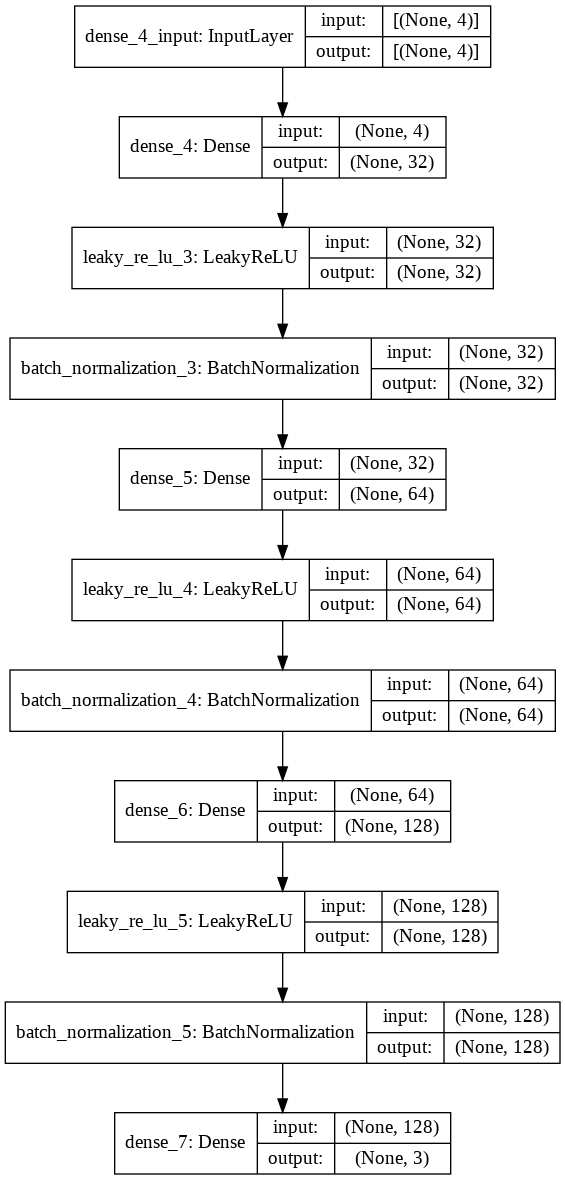

In [37]:
latent_dim = 4
generator = build_generator(numerical_data_rescaled.shape[1], latent_dim)
plot_model(generator, show_layer_names = True, show_shapes = True)

In [38]:
optimizer = Adam(lr=0.0002, beta_1=0.5)

In [39]:
def build_discriminator(inputs_n):
	model = Sequential()
	model.add(Dense(128,  kernel_initializer = "he_uniform", input_dim = inputs_n))
	model.add(LeakyReLU(0.2))
	model.add(Dense(64,  kernel_initializer = "he_uniform"))
	model.add(LeakyReLU(0.2))
	model.add(Dense(32,  kernel_initializer = "he_uniform"))
	model.add(LeakyReLU(0.2))
	model.add(Dense(16,  kernel_initializer = "he_uniform"))
	model.add(LeakyReLU(0.2))
	model.add(Dense(1, activation = "sigmoid"))
	model.compile(loss = "binary_crossentropy", optimizer = optimizer, metrics = ["accuracy"])
	return model

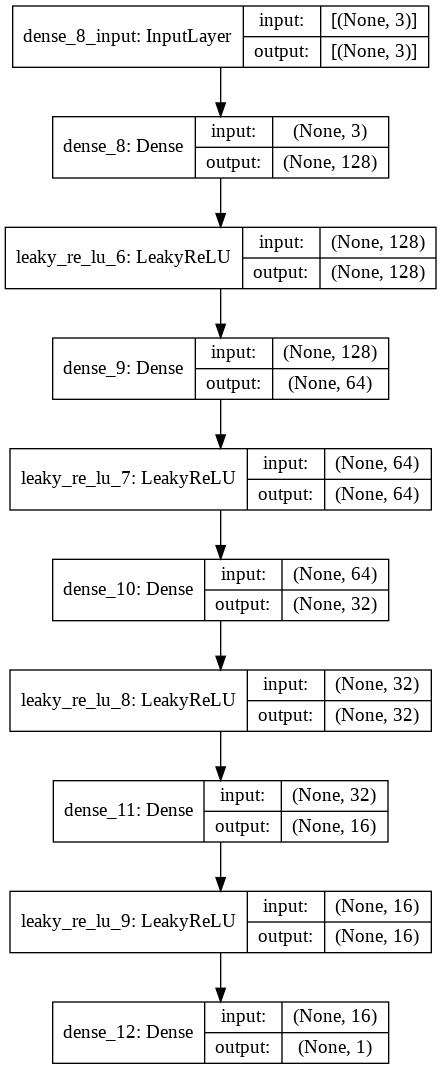

In [40]:
discriminator = build_discriminator(numerical_data_rescaled.shape[1])
plot_model(discriminator, show_layer_names = True, show_shapes = True)

In [41]:
def build_gan(generator, discriminator):
	discriminator.trainable = False
	model = Sequential()
	model.add(generator)
	model.add(discriminator)
	model.compile(loss = "binary_crossentropy", optimizer = optimizer)
	return model

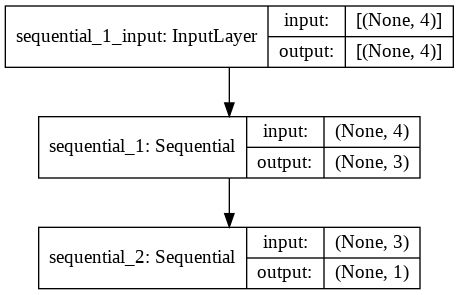

In [42]:
gan = build_gan(generator, discriminator)
plot_model(gan, show_layer_names = True, show_shapes = True)

In [43]:
def train(gan, generator, discriminator, data, latent_dim, n_epochs, n_batch, n_eval):
    #i used Half batch size for updateting discriminator
    half_batch = int(n_batch / 2)
    generator_loss = []
    discriminator_loss = []

    #generate class labels for fake = 0 and real = 1
    valid = np.ones((half_batch, 1))
    fake = np.zeros((half_batch, 1))
    y_gan = np.ones((n_batch, 1))
    for i in range(n_epochs):
        
        #select random batch from the real data
        idx = np.random.randint(0, data.shape[0], half_batch)
        real_data = data[idx]
        #generate fake samples from the noise
        noise = np.random.normal(0, 1, (half_batch, latent_dim))
        fake_data = generator.predict(noise)

        #train 
        d_loss_real, _ = discriminator.train_on_batch(real_data, valid)
        d_loss_fake, _ = discriminator.train_on_batch(fake_data, fake)

        d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)
        discriminator_loss.append(d_loss)

        #generate noise for generator input and  we train the generator ( i used this to have the discriminator label samples as valid)
        noise = np.random.normal(0, 1, (n_batch, latent_dim))
        g_loss = gan.train_on_batch(noise, y_gan)
        generator_loss.append(g_loss)

        #evaluate
        if (i+1) % n_eval == 0:
            print ("Epoch: %d [Generator loss: %f] [Discriminator loss: %f]" % (i + 1, g_loss, d_loss))
    plt.figure(figsize = (20, 10))
    plt.plot(generator_loss, label = "Generator loss")
    plt.plot(discriminator_loss, label = "Discriminator loss")
    plt.title("Stats from training GAN")
    plt.legend()
    plt.grid()

Epoch: 250 [Generator loss: 1.484769] [Discriminator loss: 0.574492]
Epoch: 500 [Generator loss: 0.739658] [Discriminator loss: 0.677164]
Epoch: 750 [Generator loss: 0.711011] [Discriminator loss: 0.699792]
Epoch: 1000 [Generator loss: 0.705155] [Discriminator loss: 0.704865]


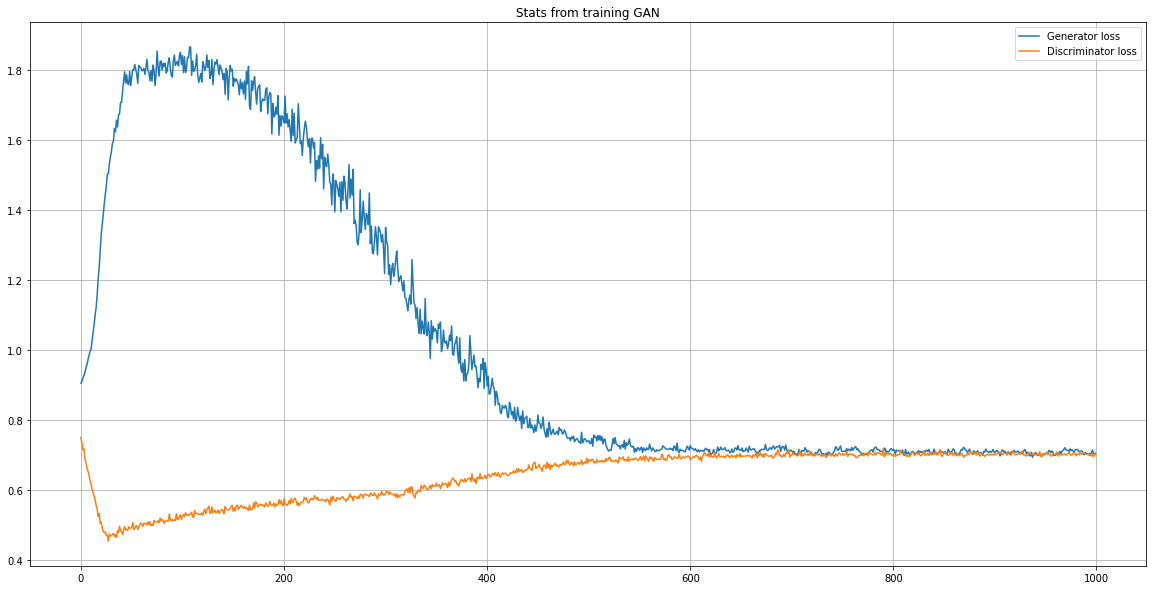

In [44]:
train(gan, generator, discriminator, numerical_data_rescaled, latent_dim, n_epochs = 1000, n_batch = 1024, n_eval = 250)

In [90]:
noise = np.random.normal(0, 1, (10000, latent_dim))
generated_data = generator.predict(noise)
generated_data

array([[2.3056567e-03, 7.9268384e-01, 9.9999940e-01],
       [1.4724135e-03, 5.6142718e-02, 1.0000000e+00],
       [1.4286637e-03, 1.1423854e-04, 2.8257906e-02],
       ...,
       [8.4131956e-04, 1.0238870e-04, 1.0000000e+00],
       [1.0102093e-03, 8.8426255e-05, 9.9890995e-01],
       [1.2329519e-03, 3.9556623e-04, 1.2401938e-03]], dtype=float32)

In [91]:
generated_data = mms.inverse_transform(generated_data)
gen_df = pd.DataFrame(data = generated_data, columns = Final_df.columns)
gen_df

,size,price,direction
0,102.437363,4.717812e+06,0.999999
1,65.778831,5.813975e+05,1.000000
2,63.854061,2.667416e+05,-0.943484
3,74.193817,2.706397e+05,1.000000
4,70.644524,2.682318e+05,0.999376
...,...,...,...
9995,77.402206,2.718090e+05,1.000000
9996,76.960350,2.835875e+05,-0.494856
9997,38.013855,2.666750e+05,1.000000
9998,45.444160,2.665966e+05,0.997820


In [92]:
gen_df.shape

(10000, 3)

In [94]:
direction=gen_df['direction']
direction[direction < 0] = -1
direction[direction > 0] = 1
print(direction)
size = gen_df['size']
size=size*10
print(size)


0       1.0
1       1.0
2      -1.0
3       1.0
4       1.0
       ... 
9995    1.0
9996   -1.0
9997    1.0
9998    1.0
9999   -1.0
Name: direction, Length: 10000, dtype: float32
0       1024.373657
1        657.788330
2        638.540588
3        741.938171
4        706.445251
           ...     
9995     774.022095
9996     769.603516
9997     380.138550
9998     454.441589
9999     552.437195
Name: size, Length: 10000, dtype: float32


In [ ]:
#replace genrated direction which rounded of them in generated dataframe


In [95]:
def normal_distribution(r, f):

	r_x = np.linspace(r.min(), r.max(), len(r))
	f_x = np.linspace(f.min(), f.max(), len(f))

	r_y = scipy.stats.norm.pdf(r_x, r.mean(), r.std())
	f_y = scipy.stats.norm.pdf(f_x, f.mean(), f.std())
 
	n, bins, patches = plt.hist([r, f], density = True, alpha = 0.5, color = ["green", "red"])
	xmin, xmax = plt.xlim()

	plt.plot(r_x, r_y, color = "green", label = "Original data", alpha = 0.5)
	plt.plot(f_x, f_y, color = "red", label = "Generated data", alpha = 0.5)
	title = f"Original data mean {np.round(r.mean(), 4)}, Original data std {np.round(r.std(), 4)}, Original data var {np.round(r.var(), 4)}\nGenerated data mean {np.round(f.mean(), 4)}, Generated data {np.round(f.std(), 4)}, Generated data var {np.round(f.var(), 2)}"
	plt.title(title)
	plt.legend()
	plt.grid()
	plt.show()

size Normal distribution


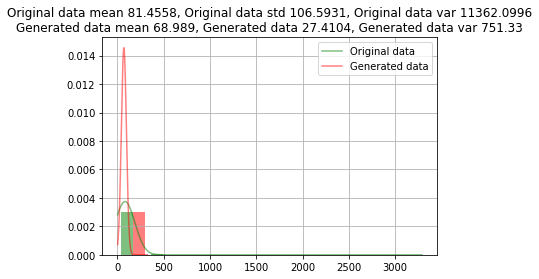

price Normal distribution


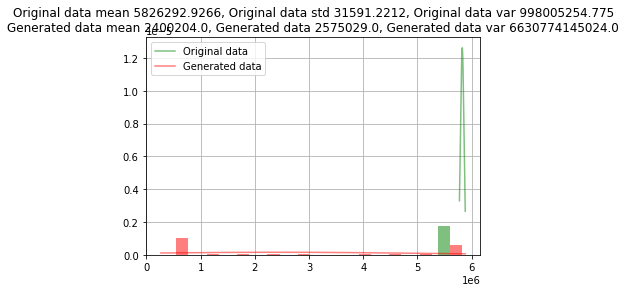

direction Normal distribution


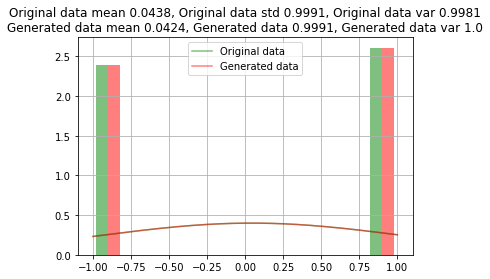

In [96]:
for column in gen_df.columns:
    print(column, "Normal distribution")
    normal_distribution(Final_df[column], gen_df[column])

Original data


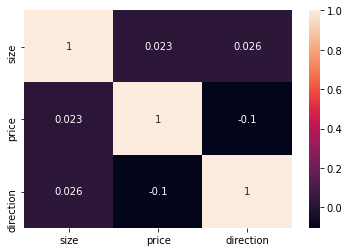

In [97]:
#correlation matrix compareing
print("Original data")
sns.heatmap(Final_df.corr(), annot = True)

Generated data


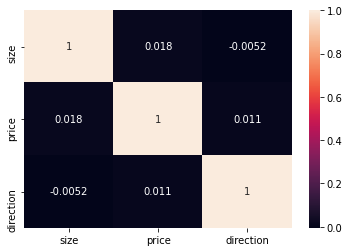

In [98]:
print("Generated data")
sns.heatmap(gen_df.corr(), annot = True)

In [100]:
generator.save('/content/gdrive/MyDrive/Classroom/AI4Trading/mygenrator')
discriminator.save('/content/gdrive/MyDrive/Classroom/AI4Trading/mydescriminator')

INFO:tensorflow:Assets written to: /content/gdrive/MyDrive/Classroom/AI4Trading/mygenrator/assets
INFO:tensorflow:Assets written to: /content/gdrive/MyDrive/Classroom/AI4Trading/mydescriminator/assets
